# Práctica 7b. Regresión lineal múltiple

La regresión lineal múltiple permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta (Y) se determina a partir de un conjunto de variables independientes llamadas predictores (X1, X2, X3…).

La regresión lineal simple consiste en generar un modelo de regresión (ecuación de una recta) que permita explicar la relación lineal que existe entre dos variables. A la variable dependiente o respuesta se le identifica como Y y a la variable predictora o independiente como X.

In [1]:
# importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

El siguiente dataframe contiene información de personas sobre las edades, sexo, cantidad de hijos, zona de resiencia y otras variables más de estas. 

Nosotros en esta práctica trabajaremos con el número de hijos promedio que tienen las personas.

In [2]:
# importamos nuestro cvs
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


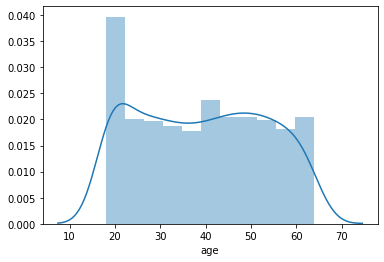

In [72]:
# graficamos la distribucion de la edad por persona
sns.distplot(df['age'])

Notamos que la mayoría de las personas son jóvenes de 20 años.

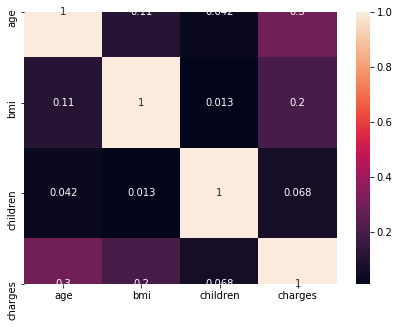

In [83]:
# matriz de correlacion entre las variables
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [84]:
# establecemos la variable X y Y
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [85]:
X = df[['bmi', 'children', 'charges']]
y = df['age']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [88]:
#importamos el modelo de regresion lineal
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()

In [119]:
# normalzamos el modelo
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# coeficientes de nuestras variables independientes
lm.coef_

array([0.09917022, 0.24527302, 0.00031642])

In [92]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['coeficientes'])
cdf

,coeficientes
bmi,0.099170
children,0.245273
charges,0.000316


Entonces, lo que quiere decir nuestra tabla de coeficientes es que, dependiendo el índice de masa corporal, la edad de una persona aumentará 0.099, dependiendo los hijos, la edad será en un aumento de 0.2452 y dependiendo los cargos de costos médicos individuales, la edad será de +0.00031. Lo que nos dice que entre más costos médicos se tengan la edad será mayor.

In [93]:
predictions = lm.predict(X_test)

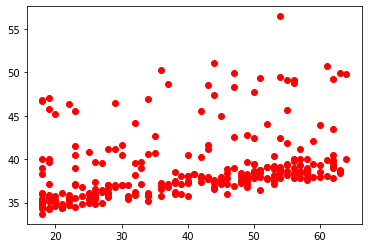

In [117]:
plt.scatter(Y_test, predictions, color = 'red')

#### Conclusión

La edad de las personas estará entre los 30 y 40 años tomando en cuenta el número de hijos, el índice de masa corporal y los gastos médicos indivduales.